<a href="https://colab.research.google.com/github/cgeraldes/AULAS/blob/main/CGRNN_NASDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NASDAQ (National Association of Securities Dealers Automated Quotations) is an American stock exchange that is known for trading technology stocks and a variety of other securities. It is the second-largest stock exchange in the world by market capitalization, after the New York Stock Exchange (NYSE). NASDAQ operates an electronic trading platform, and it is known for its role in listing many technology and internet-based companies.

In [46]:
!wget https://raw.githubusercontent.com/cgeraldes/AULAS/main/files/NASDAQ.csv

--2024-01-19 21:37:13--  https://raw.githubusercontent.com/cgeraldes/AULAS/main/files/NASDAQ.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85564 (84K) [text/plain]
Saving to: ‘NASDAQ.csv.2’

NASDAQ.csv.2        100%[===================>]  83.56K  --.-KB/s    in 0.01s   

2024-01-19 21:37:13 (6.09 MB/s) - ‘NASDAQ.csv.2’ saved [85564/85564]



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('NASDAQ.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-16,27.573000,27.750000,27.525999,27.591999,26.198719,417000
1,2019-01-17,27.528000,27.858999,27.469000,27.773001,26.370579,383000
2,2019-01-18,27.996000,28.181999,27.822001,28.056999,26.640240,771000
3,2019-01-22,27.903000,27.927000,27.334999,27.570000,26.177832,822000
4,2019-01-23,27.693001,27.767000,27.290001,27.523001,26.133200,343000


Visualizing and print the column "Close" from the DataFrame df using Matplotlib. Additionally, when you reshape Y using Y.reshape(-1, 1), you are essentially converting it from a 1D array (vector) to a 2D array (matrix) where each element is a column vector. The resulting shape is (n_samples, 1)

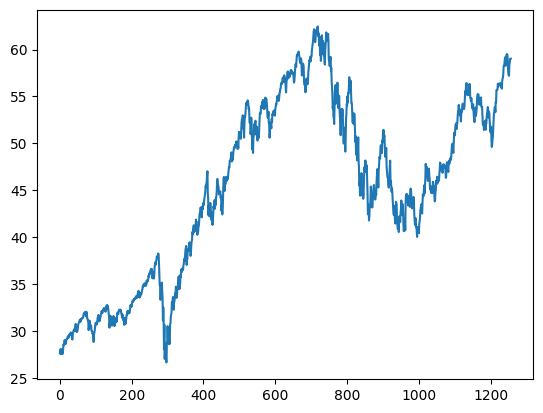

In [61]:
L = len(df)
Y = df.iloc[:,4]
Y= np.array(Y)
Y= Y.reshape(-1,1)
plt.plot(Y)
plt.show(block= False)

In [62]:
X1= Y[0:L-3,:]
X2=Y[1:L-2,:]
X3=Y[2:L-1,:]
Y = Y[3:L,:]
X= np.concatenate([X1,X2,X3],axis=1)
print(f'X shape is {X.shape}')
print(f'Y shape is {Y.shape}')
pd.DataFrame(X)

X shape is (1254, 3)
Y shape is (1254, 1)


,0,1,2
0,27.591999,27.773001,28.056999
1,27.773001,28.056999,27.570000
2,28.056999,27.570000,27.523001
3,27.570000,27.523001,27.683001
4,27.523001,27.683001,28.021000
...,...,...,...
1249,57.549999,57.240002,57.200001
1250,57.240002,57.200001,58.430000
1251,57.200001,58.430000,58.570000
1252,58.430000,58.570000,59.020000


In [50]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler1 = MinMaxScaler()
scaler1.fit(Y)
Y = scaler1.transform(Y)

In [51]:
pd.DataFrame(X)

,0,1,2
0,0.027039,0.032090,0.040015
1,0.032090,0.040015,0.026425
2,0.040015,0.026425,0.025114
3,0.026425,0.025114,0.029578
4,0.025114,0.029578,0.039010
...,...,...,...
1249,0.862991,0.854341,0.853224
1250,0.854341,0.853224,0.887546
1251,0.853224,0.887546,0.891453
1252,0.887546,0.891453,0.904010


In [52]:
X.shape

(1254, 3)

This reshaping is converting the original matrix X with shape (n_samples, 3 * n_features) to a 3D array with shape (n_samples, 1, 3 * n_features). The purpose of this reshaping is to fit the input requirements of some neural network architectures, particularly those that expect input data in the form of sequences.
In the reshaped array:

The first dimension (n_samples) represents the number of samples.
The second dimension (1) represents a time step or sequence length. In this case, it's set to 1, suggesting that each row is treated as a separate time step.
The third dimension (3 * n_features) represents the features at each time step.
This shape is suitable for models that expect input in the form of (batch_size, timesteps, features).

In [53]:
X= np.reshape(X, (X.shape[0],1,X.shape[1]))

In [54]:
X_train = X[:190,:,:]
X_test = X[190:,:,:]
Y_train = Y[:190,:]
Y_test = Y[190:,:]

In [56]:
model = Sequential()
model.add(LSTM(10,activation = 'tanh',input_shape = (1,3),recurrent_activation= 'hard_sigmoid'))

In [57]:
model.add(Dense(1))

In [58]:
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train,Y_train,epochs=100,verbose=2)
Predict = model.predict(X_test)

Epoch 1/100
6/6 - 2s - loss: 0.0126 - mean_absolute_error: 0.1064 - 2s/epoch - 310ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0077 - mean_absolute_error: 0.0820 - 26ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0051 - mean_absolute_error: 0.0651 - 23ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0033 - mean_absolute_error: 0.0515 - 19ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0022 - mean_absolute_error: 0.0408 - 23ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0014 - mean_absolute_error: 0.0327 - 22ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0010 - mean_absolute_error: 0.0277 - 21ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 8.3520e-04 - mean_absolute_error: 0.0246 - 23ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 7.5699e-04 - mean_absolute_error: 0.0229 - 23ms/epoch - 4ms/step
Epoch 10/100
6/6 - 0s - loss: 7.3224e-04 - mean_absolute_error: 0.0220 - 23ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 7.1575e-04 - mean_absolute_error: 0.0217 - 24ms/epoch - 4

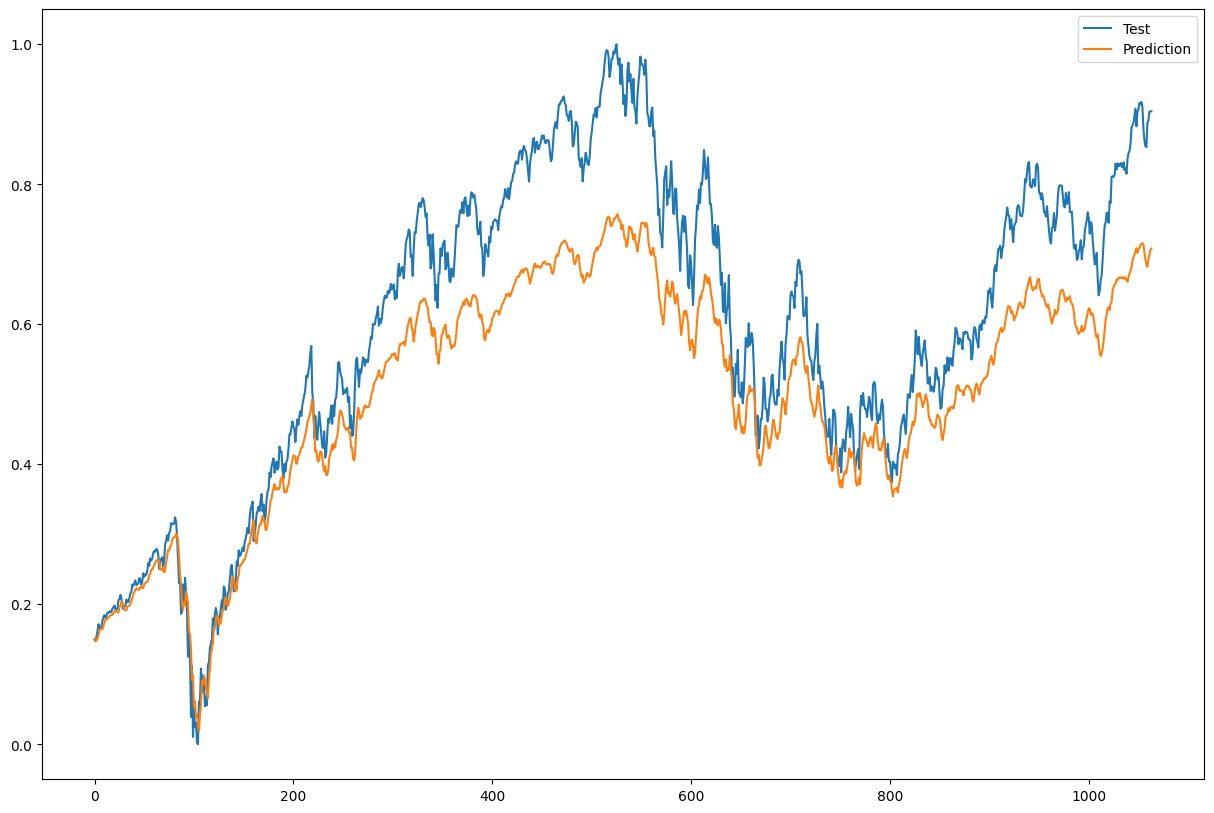

In [59]:
plt.figure(figsize=(15,10))
plt.plot(Y_test,label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()